In [102]:
pip install selenium

     ------------------------------------- 986.0/986.0 kB 20.8 MB/s eta 0:00:00
  Using cached trio-0.21.0-py3-none-any.whl (358 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
     ------------------------------------- 179.1/179.1 kB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 118.7/118.7 kB ? eta 0:00:00
  Using cached h11-0.13.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [64]:
import requests
import json
import pandas as pd

import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
url = "http://data.ex.co.kr/openapi/odtraffic/upDownTrafficAmount"


params = {'key' : '2683876556',
          'type' : 'json',
          'startUnitCode' : '101',
          'endUnitCode' : '140'
}

response = requests.get(url,params=params)
response

<Response [200]>

In [2]:
response.text

'{"list":[{"pageNo":null,"numOfRows":null,"tmType":"2","trafficAmout":"3","tmName":"15분","carType":"1","sumTm":"1645","startUnitCode":"101 ","startUnitName":"서울","endUnitCode":"140 ","endUnitName":"부산"}],"count":1,"pageNo":1,"numOfRows":10,"pageSize":1,"message":"인증키가 유효합니다.","code":"SUCCESS"}'

In [94]:
js = json.loads(response.text)

In [96]:
js['list']

[{'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '101 ',
  'startUnitName': '서울',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '16333',
  'timeMid': None,
  'timeMax': '15356',
  'timeMin': '15356'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '115 ',
  'startUnitName': '대전',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '-1',
  'timeMid': None,
  'timeMax': '0',
  'timeMin': '0'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '130 ',
  'startUnitName': '동김천',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '-1',
  'timeMid': None,
  'timeMax': '0',
  'timeMin': '0'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '132 ',
  'startUnitName': '영천',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '3691',
  'timeMid': None,
  'timeMax': '4316',
  'timeMin

In [97]:
df = pd.DataFrame(js['list'])

In [98]:
df

,tmType,tmName,carType,sumTm,startUnitCode,startUnitName,endUnitCode,endUnitName,timeAvg,timeMid,timeMax,timeMin
0,2,15분,1,1745,101,서울,140,부산,16333,None,15356,15356
1,2,15분,1,1745,115,대전,140,부산,-1,None,0,0
2,2,15분,1,1745,130,동김천,140,부산,-1,None,0,0
3,2,15분,1,1745,132,영천,140,부산,3691,None,4316,2904
4,2,15분,1,1745,135,경주,140,부산,2511,None,3551,2087
5,2,15분,2,1745,135,경주,140,부산,-1,None,0,0
6,2,15분,6,1745,139,서울산,140,부산,1267,None,1318,1233
7,2,15분,1,1745,139,서울산,140,부산,1255,None,1476,1148
8,2,15분,2,1745,139,서울산,140,부산,-1,None,0,0
9,2,15분,1,1745,137,통도사,140,부산,1027,None,1160,914


In [87]:
df[df['sphlDfttCode'] == '2']['sphlDfttScopTypeCode'].unique()

array(['5', '6', '7'], dtype=object)

In [145]:
day = dt.datetime(2021, 8, 22)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [104]:


# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/time/timeCity#")



In [148]:
for i in range(0,42):

    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div.item > div > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(6)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(3)

In [24]:
driver.close()

----

In [5]:
# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/traffic/trafficUpDownIc#")

In [6]:
day = dt.datetime(2022, 9, 1)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

In [7]:
for i in range(0,60):
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div:nth-child(4) > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(3)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(2)

In [187]:
df_sample = pd.read_csv('./통행시간/OpenOASIS (1).csv',encoding='cp949')

In [211]:
df_sample

,출발,도착,자료종류,시간,2022.08.29,2022.08.28,2022.08.27,2022.08.26,2022.08.25,2022.08.24,...,2022.08.08,2022.08.07,2022.08.06,2022.08.05,2022.08.04,2022.08.03,2022.08.02,2022.08.01,2022.07.31,2022.07.30
0,서울,부산,평균값,00시,249,0,239,251,0,211,...,254,215,270,325,0,225,0,261,195,272
1,서울,부산,평균값,01시,246,296,0,260,246,243,...,0,213,262,0,0,0,368,256,212,273
2,서울,부산,평균값,02시,248,279,0,0,268,243,...,244,0,255,296,0,0,312,0,0,246
3,서울,부산,평균값,03시,0,0,0,0,0,282,...,241,0,248,0,221,0,306,257,258,266
4,서울,부산,평균값,04시,237,264,335,0,0,310,...,0,206,0,0,226,234,0,294,0,251
5,서울,부산,평균값,05시,0,0,0,260,0,258,...,225,0,0,0,0,404,0,0,0,241
6,서울,부산,평균값,06시,236,252,0,0,0,250,...,225,0,245,272,0,0,0,0,229,0
7,서울,부산,평균값,07시,0,0,0,291,251,236,...,231,277,0,269,0,0,0,0,270,274
8,서울,부산,평균값,08시,239,0,248,284,0,236,...,248,310,235,261,235,0,0,290,0,311
9,서울,부산,평균값,09시,241,0,0,280,0,0,...,0,0,226,252,233,0,0,279,272,267


In [193]:
def func(a):
    if len(str(a)) > 3:
        h,m = map(int,a.split(':'))
        t = h*60 + m
        return int(t)
    return a

In [194]:
for col in df_sample.columns:
    df_sample[col] = df_sample[col].apply(func)

In [212]:
df_sample['2022.08.29'].sum() / (24 -(df_sample['2022.08.29'] == 0).sum())


262.0625

In [11]:
df_sample

,time,통행시간


In [33]:
df_sample.iloc[1,3]

'01시'

In [313]:
ridx = 0
new_lst = []
pass_lst = []

for i in range(1,73):
    df = pd.read_csv(f'./통행시간/OpenOASIS ({i}).csv',encoding='cp949')

    for col in df.columns:
        df[col] = df[col].apply(func)
    
    for row in range(df.shape[0]):
        cidx = 0
        for col in df.columns:
            if cidx > 3:           
                ymd = col.split('.')
                new =  dt.datetime(int(ymd[0]), int(ymd[1]), int(ymd[2]))
                new_lst.append(new)
                df[col] = df[col].astype(int)

                did = (24 -(df[col] == 0).sum())
                if did :
                    pass_lst.append(df[col].sum() // did)
                else:
                    pass_lst.append(0)
                    
            cidx += 1

In [380]:
df_tmp = pd.DataFrame({'datetime':new_lst,'time':pass_lst})

In [385]:
df_tmp['datetime'].value_counts()

2022-08-29    1
2018-07-31    1
2018-08-06    1
2018-08-05    1
2018-08-04    1
             ..
2020-08-21    1
2020-08-22    1
2020-08-23    1
2020-08-24    1
2016-07-20    1
Name: datetime, Length: 2232, dtype: int64

In [307]:
ridx = 0
new_lst = []
pass_lst = []

for i in range(1,73):
    df = pd.read_csv(f'./통행시간/OpenOASIS ({i}).csv',encoding='cp949')

    for row in range(df.shape[0]):
        cidx = 0
        for col in df.columns:
            if cidx > 3:           
                ymd = col.split('.')
                new =  dt.datetime(int(ymd[0]), int(ymd[1]), int(ymd[2]),int(df.iloc[row,3][:-1]))
                new_lst.append(new)
                pass_lst.append(df.iloc[ridx,cidx])
            cidx += 1

In [46]:
print(len(ymd_lst))
print(len(h_lst))
print(len(pass_lst))

53568
53568
53568


In [308]:
df_tmp['datetime'] = new_lst
df_tmp['통행시간'] = pass_lst

In [30]:
df_tmp.drop('Unnamed: 0',axis=1,inplace=True)

In [386]:
df_tmp.sort_values(by='datetime',inplace=True)

In [317]:
df_tmp = df_tmp.reset_index()


In [319]:
df_tmp.drop('index',axis=1,inplace=True)

In [383]:
df_tmp.drop_duplicates('datetime',inplace=True)

In [48]:
df_tmp

,datetime,time
0,2016-07-20,318
1,2016-07-21,290
2,2016-07-22,282
3,2016-07-23,296
4,2016-07-24,284
...,...,...
2227,2022-08-25,278
2228,2022-08-26,279
2229,2022-08-27,302
2230,2022-08-28,279


In [355]:
df_tmp = df_tmp[df_tmp['datetime'] >= '2019-11-01']

In [44]:
df_tmp = pd.read_csv('highway_data2.csv',index_col=False)

In [47]:
df_tmp.drop('Unnamed: 0',axis = 1,inplace=True)

In [97]:
df_tmp['통행시간(분)'] = df_tmp['통행시간'].apply(func)

In [103]:
df_tmp.drop('통행시간',axis= 1,inplace=True)

In [269]:
df_tmp.to_csv('highway_data2.csv')

In [224]:
df_tmp.sort_values(by='datetime',inplace=True)

In [227]:
df_tmp.reset_index(inplace=True)

In [231]:
df_tmp.drop('index',inplace=True,axis=1)

In [400]:
df_tmp = df_tmp.iloc[1200:]

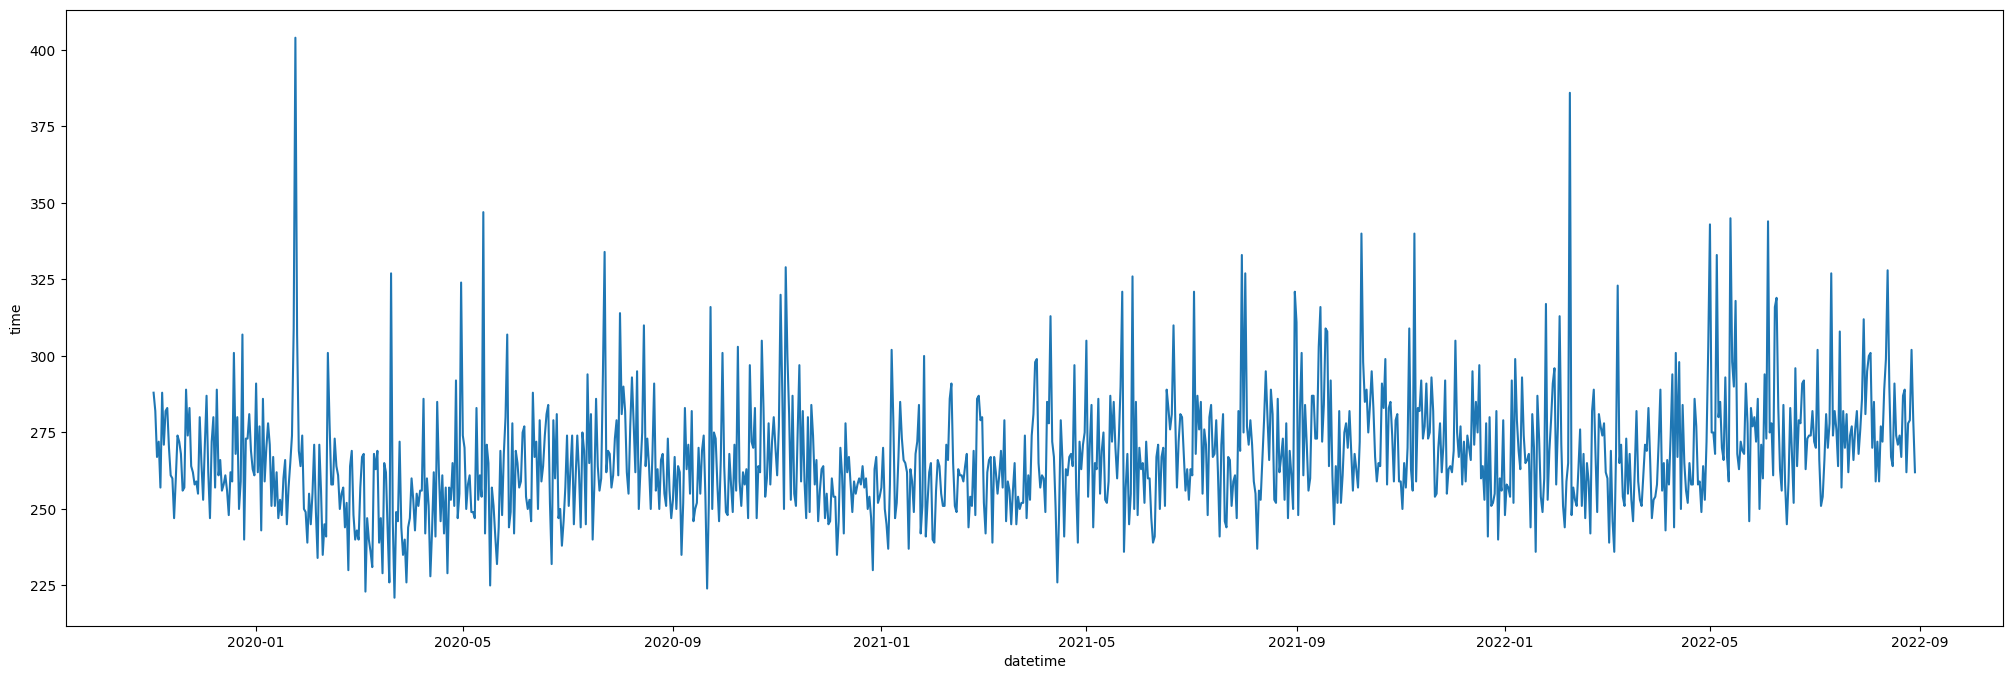

In [401]:
plt.figure(figsize=(25,8))
sns.lineplot(x='datetime',y='time',data=df_tmp)
plt.show()

In [402]:

# product 함수를 이용하여 값의 조합을 구성
p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [389]:
df_tmp.set_index('datetime', inplace=True)

In [390]:
df_tmp = df_tmp.asfreq('D')

In [24]:
df_tmp

NameError: name 'df_tmp' is not defined

In [403]:
y = df_tmp.loc[:, 'time']

In [404]:
train = y[:-30]
val = y[-30:]

In [405]:
train


datetime
2019-11-02    288
2019-11-03    282
2019-11-04    267
2019-11-05    272
2019-11-06    257
             ... 
2022-07-26    282
2022-07-27    268
2022-07-28    276
2022-07-29    286
2022-07-30    312
Freq: D, Name: time, Length: 1002, dtype: int64

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


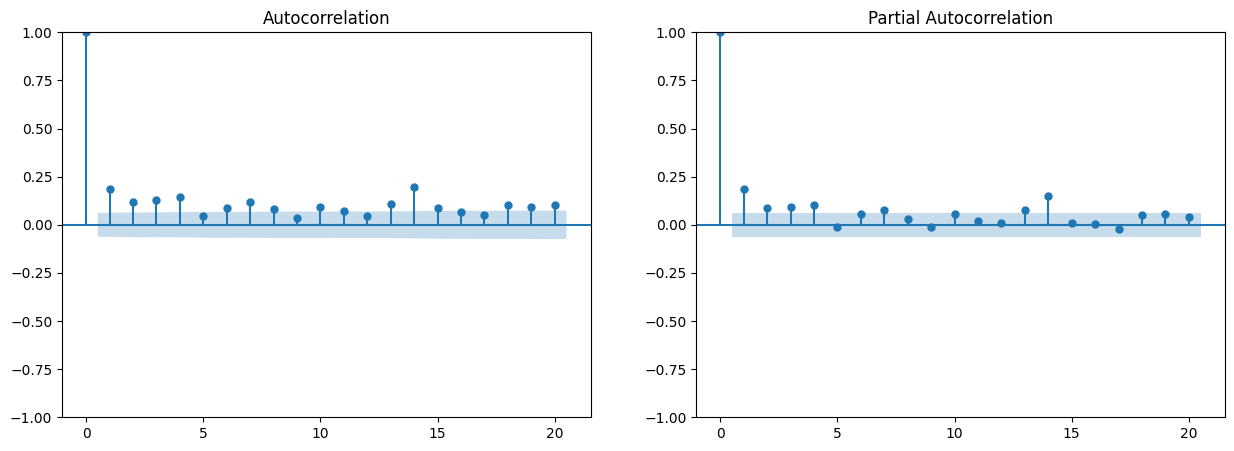

In [406]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(train, lags = lags, ax = ax[0])
plot_pacf(train, lags = lags, ax = ax[1])
plt.show()

In [407]:
p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [0,1]
iter = list(product(p,d,q))

In [408]:
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 4)
(1, 1, 0)
(1, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 0, 0)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2, 0, 1)
(2, 0, 2)
(2, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2, 0, 4)
(2, 1, 0)
(2, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2)
(2, 1, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(3, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4)
(3, 1, 0)
(3, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(3, 1, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 4)
(4, 1, 0)
(4, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(4, 1, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3)
(4, 1, 4)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [368]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
42,"(4, 0, 2)",12.074028,18576.236835


,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.161139,18546.356961


In [415]:
#model2_1 = sm.tsa.SARIMAX(train, order=(4,0,2)).fit()
model2_2 = sm.tsa.SARIMAX(train, order=(4,1,3)).fit()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [348]:
def residual_diag(residuals, lags = 20) :

    print('* 정규성 검정(> 0.05) : ', round(stats.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


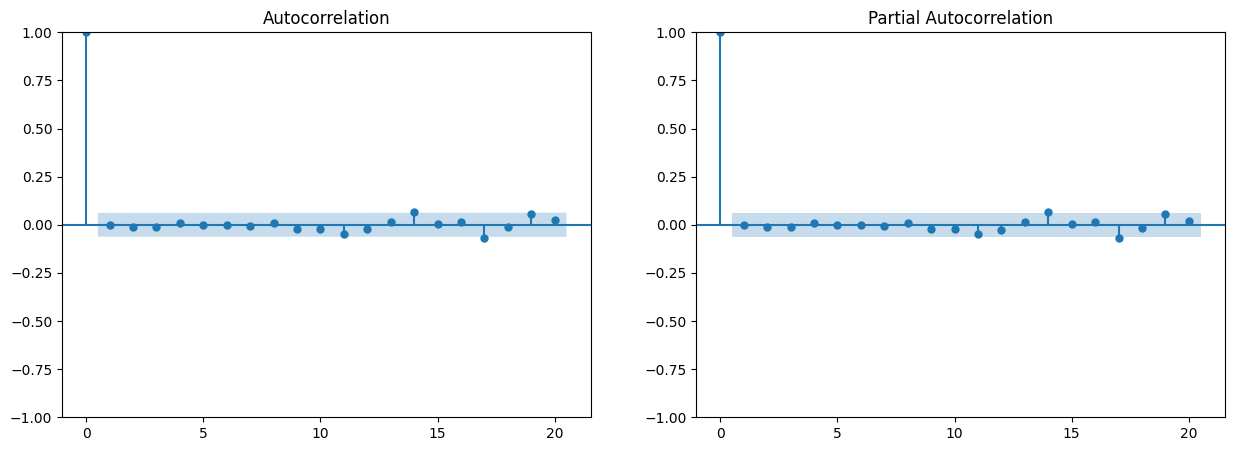

In [416]:
residuals = model2_2.resid
residual_diag(residuals)

In [424]:
from sklearn.model_selection import TimeSeriesSplit

In [425]:
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)

In [426]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 4,1,4

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    train = y[train_index]
    val = y[val_index]

    # 학습
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # 예측
    pred = model.forecast(val_size)
    preds += list(pred)

    # 잔차 저장
    residuals += list(model.resid)

    # 평가
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

NameError: name 'x' is not defined

In [421]:
pred = model2_2.forecast(30)
mean_absolute_percentage_error(val, pred)

0.04247475160629504

In [422]:
val

datetime
2022-07-31    281
2022-08-01    295
2022-08-02    300
2022-08-03    301
2022-08-04    270
2022-08-05    285
2022-08-06    259
2022-08-07    272
2022-08-08    259
2022-08-09    277
2022-08-10    272
2022-08-11    289
2022-08-12    299
2022-08-13    328
2022-08-14    290
2022-08-15    267
2022-08-16    264
2022-08-17    291
2022-08-18    274
2022-08-19    271
2022-08-20    274
2022-08-21    267
2022-08-22    287
2022-08-23    289
2022-08-24    262
2022-08-25    278
2022-08-26    279
2022-08-27    302
2022-08-28    279
2022-08-29    262
Freq: D, Name: time, dtype: int64

In [423]:
pred

2022-07-31    276.213144
2022-08-01    279.365386
2022-08-02    282.796040
2022-08-03    275.517987
2022-08-04    273.421849
2022-08-05    281.292011
2022-08-06    279.742591
2022-08-07    272.532297
2022-08-08    277.284485
2022-08-09    282.372061
2022-08-10    275.352427
2022-08-11    273.394639
2022-08-12    281.285216
2022-08-13    279.725473
2022-08-14    272.531941
2022-08-15    277.297684
2022-08-16    282.365319
2022-08-17    275.341891
2022-08-18    273.405974
2022-08-19    281.290668
2022-08-20    279.711702
2022-08-21    272.532626
2022-08-22    277.311146
2022-08-23    282.358634
2022-08-24    275.331413
2022-08-25    273.417328
2022-08-26    281.296083
2022-08-27    279.697937
2022-08-28    272.533348
2022-08-29    277.324586
Freq: D, Name: predicted_mean, dtype: float64

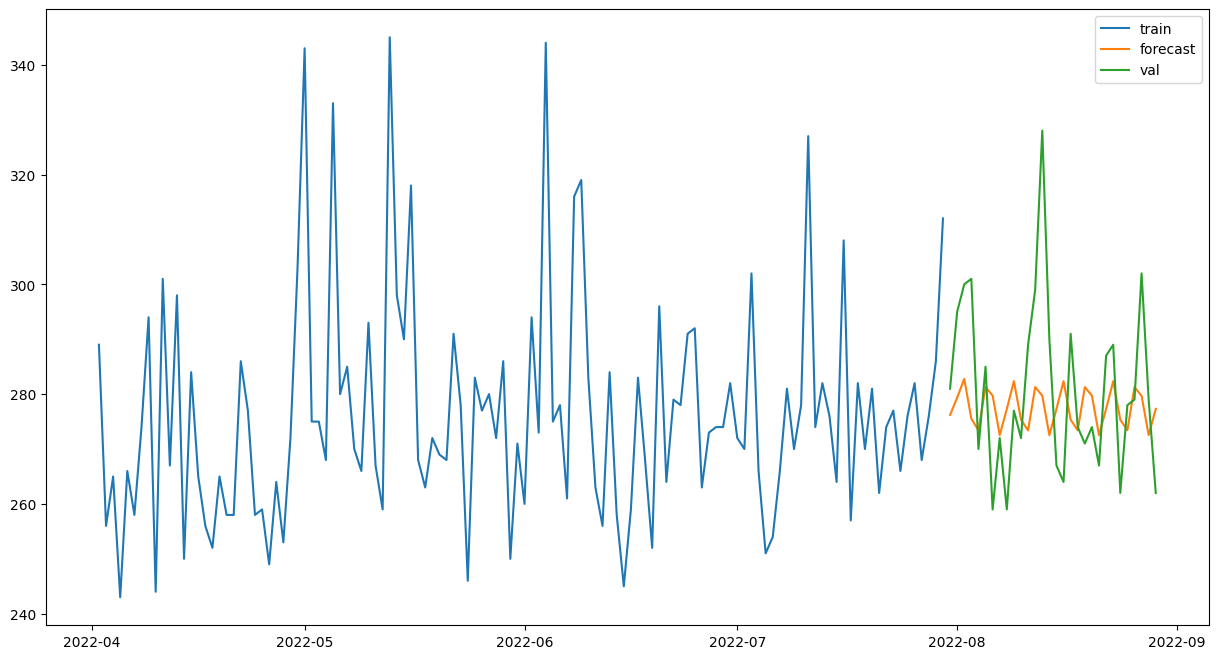

In [419]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

---

In [42]:
df_traffic = pd.read_csv('./이용차량/OpenOASIS (1).csv',encoding='cp949')

In [12]:
df_traffic

,출발,도착,일자,교통량
0,서울,부산,2022.08.02,16
1,서울,부산,2022.08.03,16
2,서울,부산,2022.08.04,16
3,서울,부산,2022.08.05,14
4,서울,부산,2022.08.06,18
5,서울,부산,2022.08.07,13
6,서울,부산,2022.08.08,18
7,서울,부산,2022.08.09,5
8,서울,부산,2022.08.10,6
9,서울,부산,2022.08.11,17


In [43]:
for i in range(2,68):
    df_tmp1 = pd.read_csv(f'./이용차량/OpenOASIS ({i}).csv',encoding='cp949')
    df_traffic = pd.concat([df_tmp1,df_traffic])

In [46]:
df_traffic.drop(['출발','도착'],axis=1,inplace=True)

In [15]:
def transform(a):
    return a.replace('.','-')

In [44]:
df_traffic['일자'] = df_traffic['일자'].apply(transform)

In [45]:
df_traffic

,출발,도착,일자,교통량
0,서울,부산,2022-01-27,19
1,서울,부산,2022-01-28,26
2,서울,부산,2022-01-29,48
3,서울,부산,2022-01-30,46
4,서울,부산,2022-01-31,20
...,...,...,...,...
26,서울,부산,2022-08-28,11
27,서울,부산,2022-08-29,12
28,서울,부산,2022-08-30,11
29,서울,부산,2022-08-31,10


In [47]:
df_traffic.set_index('일자', inplace=True)

In [79]:
df_tmp = df_tmp[df_tmp['datetime'] >= '2019-11-20']

In [50]:
df_tmp.set_index('datetime', inplace=True)

In [51]:
df= pd.merge(df_tmp,df_traffic,left_index=True,right_on='일자')
# https://haloaround.tistory.com/267

In [48]:
df_tmp = pd.read_csv('highway_data2.csv')

In [49]:
df_tmp.drop('Unnamed: 0',axis=1,inplace=True)

In [2]:
df_tmp

NameError: name 'df_tmp' is not defined

In [53]:
df.to_csv('data.csv')

In [55]:
df['time_lag_day1'] = df['time'].shift()

In [57]:
df['time_lag_day7'] = df['time'].shift(7)
df['time_lag_day30'] = df['time'].shift(30)

In [59]:
df['교통량_lag_day1'] = df['교통량'].shift()
df['교통량_lag_day7'] = df['교통량'].shift(7)
df['교통량_lag_day30'] = df['교통량'].shift(30)

In [61]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [63]:
df.to_csv('data_final.csv')